In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

# 7NIO

t = md.load_pdb('7NIO/aligned_models/AF_model0_ALIGNED.pdb')

In [23]:
rna_phosphate_atoms = t.topology.select("resname U and name P")
nsp13_near_rna = md.compute_neighbors(t, 0.5, rna_phosphate_atoms)

# Get the residues of the selected atoms

residue_names = []

for frame in nsp13_near_rna:
    for atom_index in frame:
        residue = t.topology.atom(atom_index).residue
        if residue.name != 'U':
            if residue.name not in residue_names:
                residue_names.append(residue.name)

print(sorted(residue_names))

# Expect primarily positively charged (HIS, LYS, ARG) and polar residues (SER, TYR, THR, ASN, GLN) ~ 7 out of 11

['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'HIS', 'PRO', 'SER', 'THR', 'TYR', 'VAL']


In [25]:
rna_oxygen_atoms = t.topology.select("resname U and (name O2 or name O4)")
nsp13_near_rna = md.compute_neighbors(t, 0.5, rna_oxygen_atoms)
#print(nsp13_near_rna)

# Get the residues of the selected atoms

residue_names = []

for frame in nsp13_near_rna:
    for atom_index in frame:
        residue = t.topology.atom(atom_index).residue
        if residue.name != 'U':
            if residue.name not in residue_names:
                residue_names.append(residue.name)

print(residue_names)

# Expect hydrogen bond donors with polar chemical groups (SER, TYR, THR, ASN, GLN) 
# or non-polar residues with aromatic groups for hydrophobic pi-pi stacking (PHE, TYR, TRP, PRO) 
# 6 out of 10

['LYS', 'PRO', 'ASN', 'TYR', 'HIS', 'THR', 'ARG', 'MET', 'ALA', 'SER']


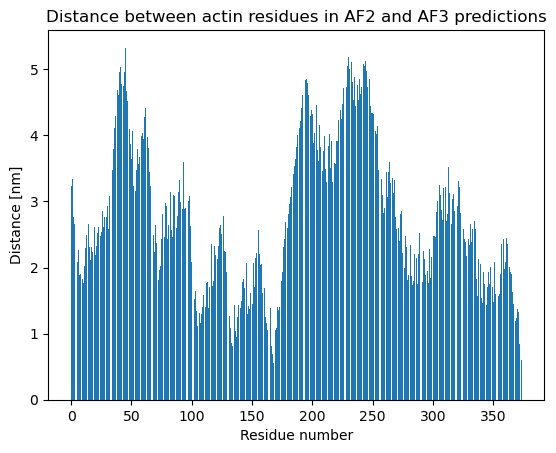

<Figure size 640x480 with 0 Axes>

In [76]:
# 2BTF complex 

af3 = md.load_pdb('2BTF_complex/2BTF_ATP_AF3/fold_2024_10_17_15_07_model_0.pdb')
af2 = md.load_pdb('2BTF_complex/2BTF_ColabFold-AF2/test_923b1_unrelaxed_rank_002_alphafold2_multimer_v3_model_1_seed_000.pdb')

actin_residues_af2 = af2.topology.select('chainid 0 and not name H')  
actin_residues_af3 = af3.topology.select('chainid 0 and not name H')

#print(actin_residues_af2)

# Align AF3 to AF2 based on actin residues
af3_aligned = af3.superpose(af2, atom_indices=actin_residues_af2, ref_atom_indices=actin_residues_af2)
actin_residues_af3_aligned = af3_aligned.topology.select('chainid 0 and not name H')

distances = np.sqrt(np.sum((af2.xyz[0, actin_residues_af2, :] - af3_aligned.xyz[0, actin_residues_af3_aligned[-1], :])**2, axis=1))

residue_numbers = [af2.topology.atom(i).residue.index for i in actin_residues_af2]

plt.figure()
plt.bar(residue_numbers, distances)
plt.xlabel('Residue number')
plt.ylabel('Distance [nm]')
plt.title('Distance between actin residues in AF2 and AF3 predictions')
plt.show()
plt.savefig('2BTF_complex/Images/actin_AF3_and_AF2_distance_bar_chart.png')

# High deviation is observed in three regions which are relatively far from ATP: 
# residues ~36-52 (a disordered loop), residues ~195-201 (another loop) and ~236-250 (a beta-sheet on the protein surface) 

In [ ]:
# 1V1D ensemble

!ls -A1 1V1D_ensemble/1V1D_ColabFold/*pdb > 1V1D_ensemble/1V1D_ColabFold/pdblist

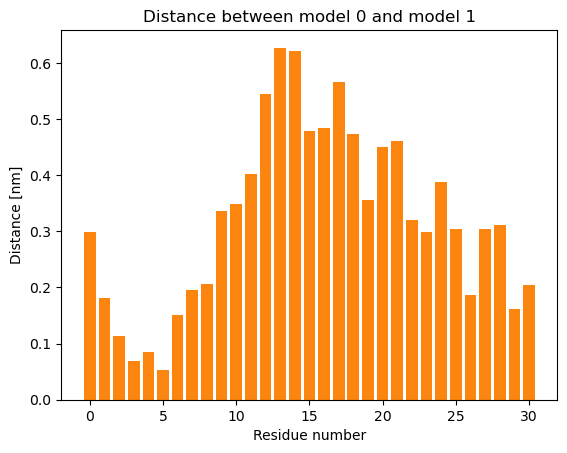

<Figure size 640x480 with 0 Axes>

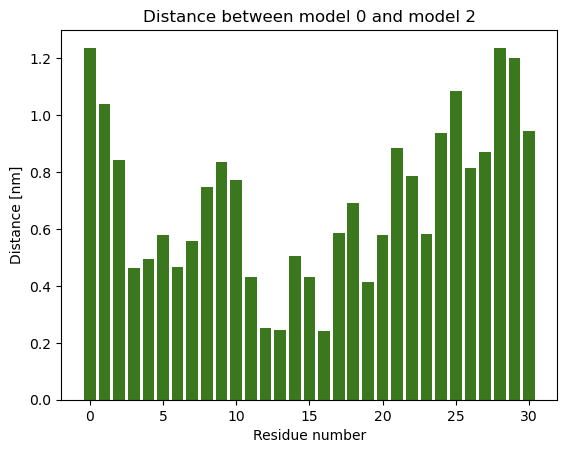

<Figure size 640x480 with 0 Axes>

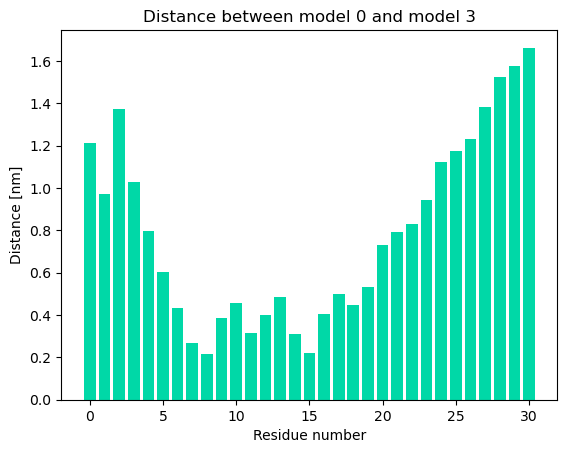

<Figure size 640x480 with 0 Axes>

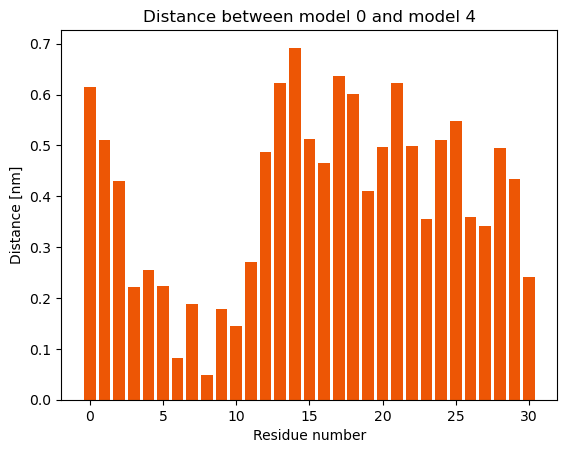

<Figure size 640x480 with 0 Axes>

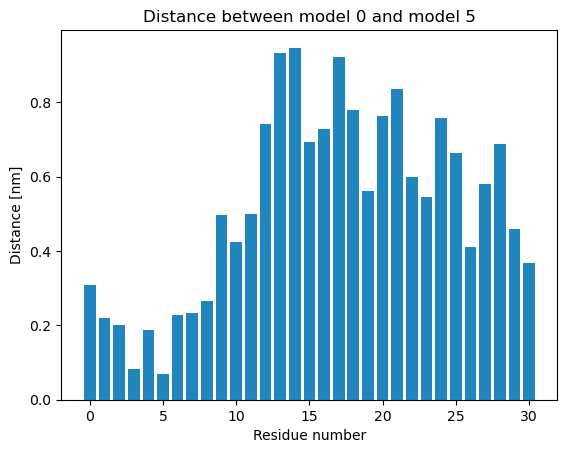

<Figure size 640x480 with 0 Axes>

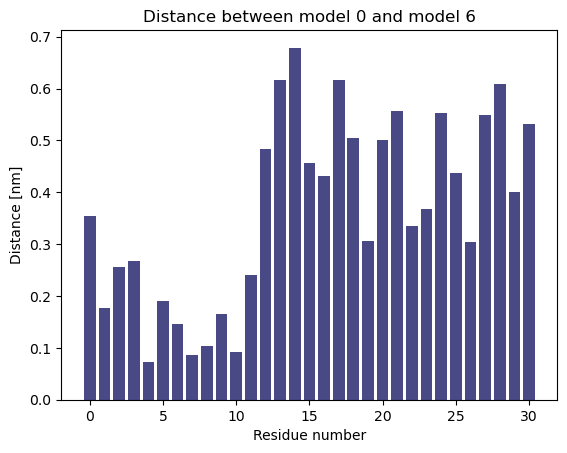

<Figure size 640x480 with 0 Axes>

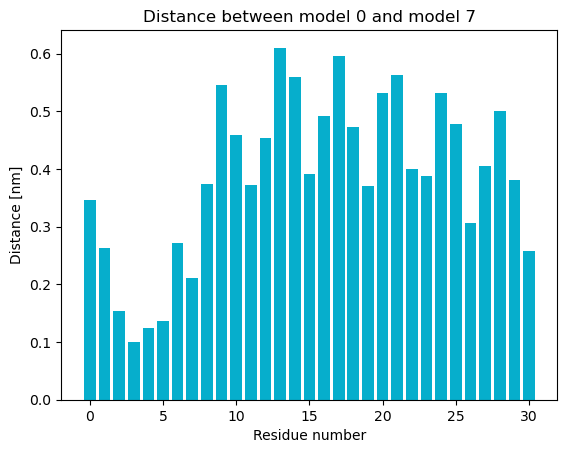

<Figure size 640x480 with 0 Axes>

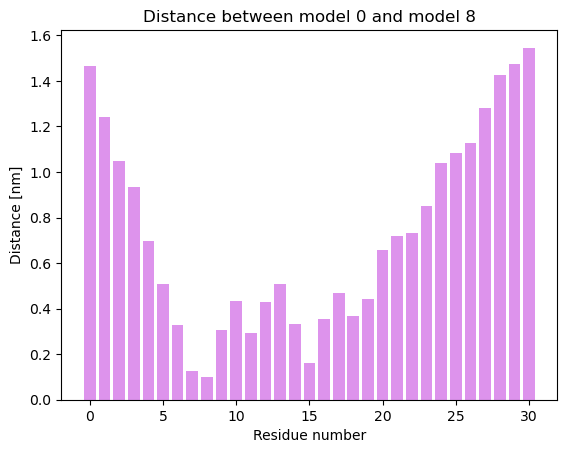

<Figure size 640x480 with 0 Axes>

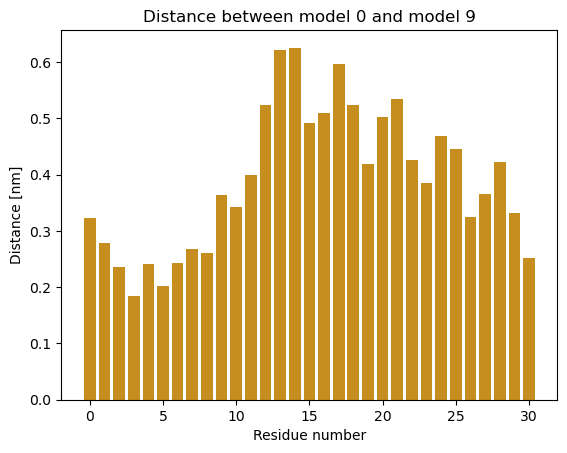

<Figure size 640x480 with 0 Axes>

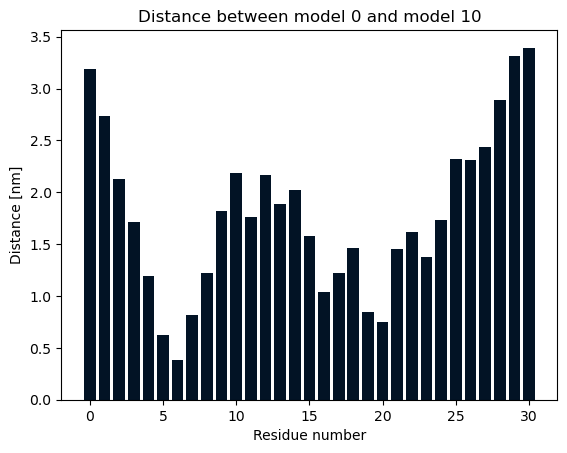

<Figure size 640x480 with 0 Axes>

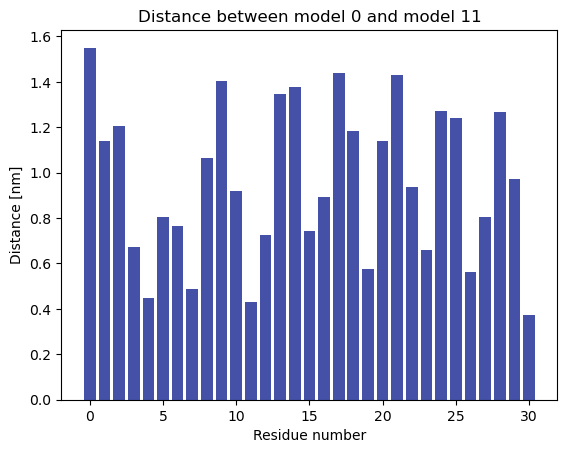

<Figure size 640x480 with 0 Axes>

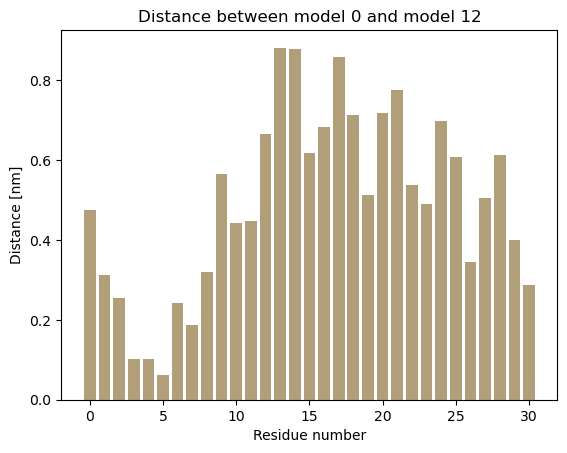

<Figure size 640x480 with 0 Axes>

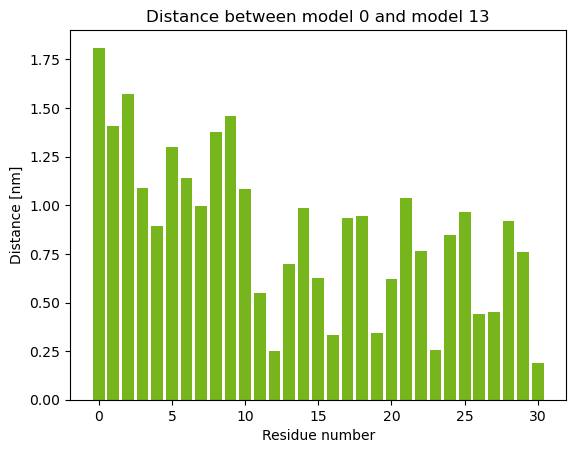

<Figure size 640x480 with 0 Axes>

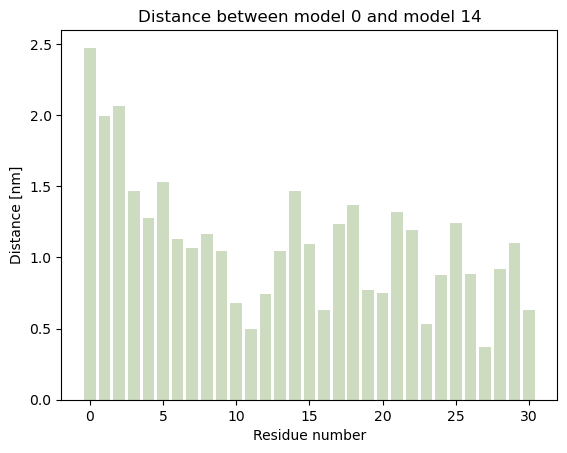

<Figure size 640x480 with 0 Axes>

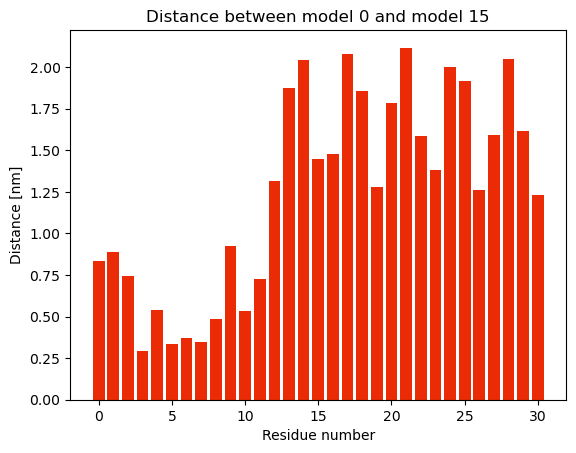

<Figure size 640x480 with 0 Axes>

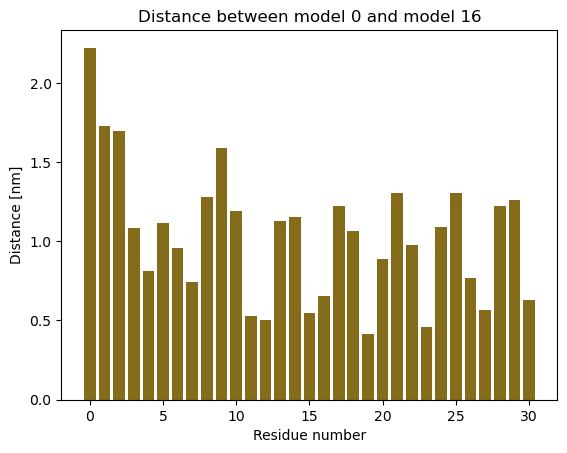

<Figure size 640x480 with 0 Axes>

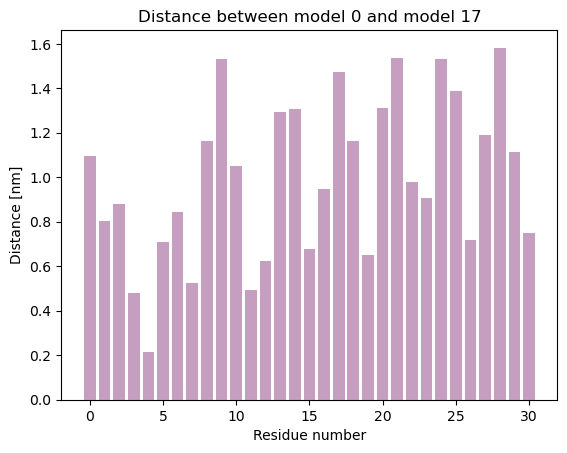

<Figure size 640x480 with 0 Axes>

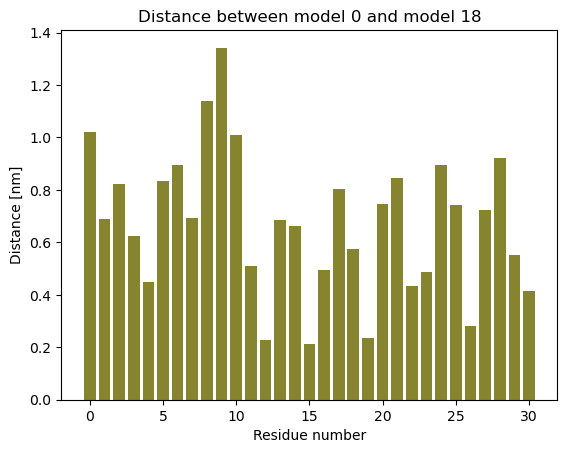

<Figure size 640x480 with 0 Axes>

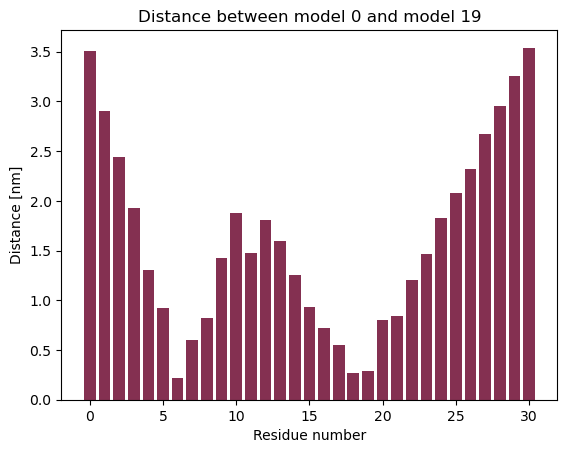

<Figure size 640x480 with 0 Axes>

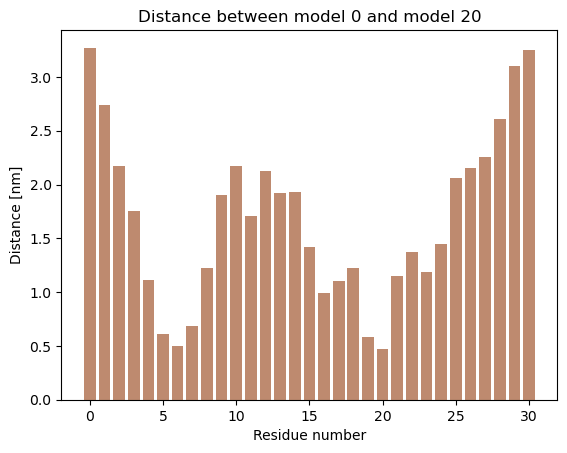

<Figure size 640x480 with 0 Axes>

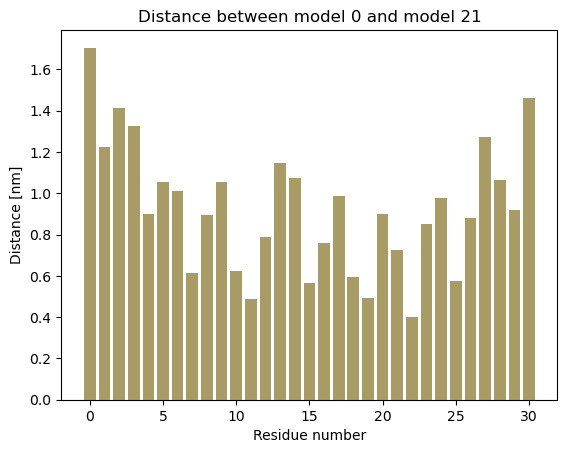

<Figure size 640x480 with 0 Axes>

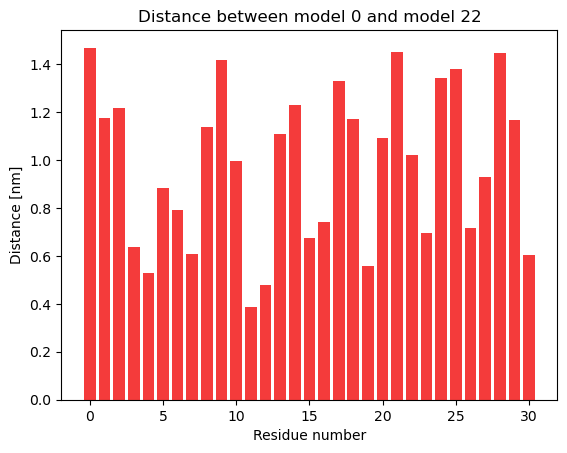

<Figure size 640x480 with 0 Axes>

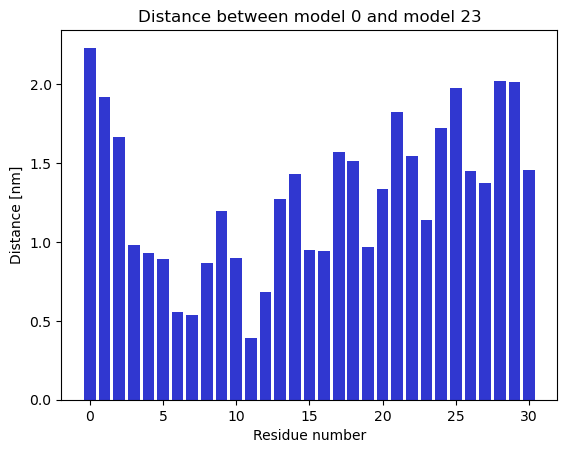

<Figure size 640x480 with 0 Axes>

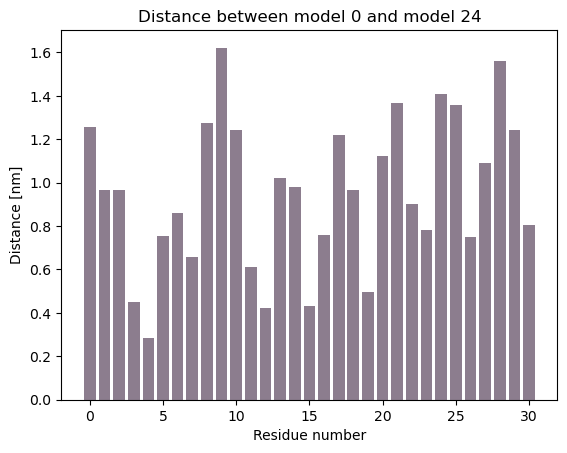

<Figure size 640x480 with 0 Axes>

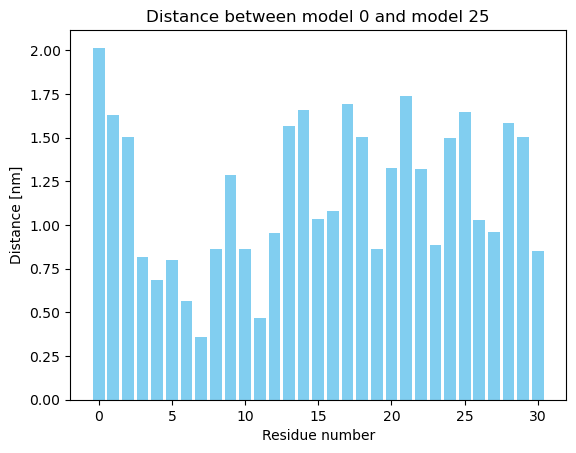

<Figure size 640x480 with 0 Axes>

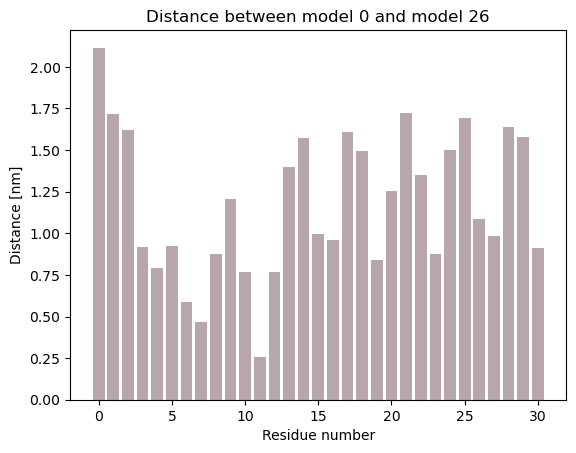

<Figure size 640x480 with 0 Axes>

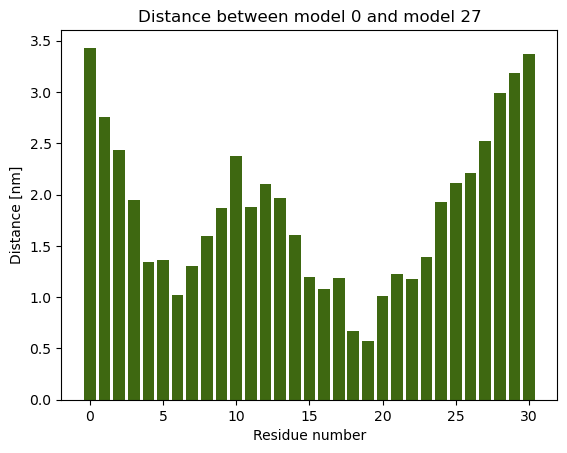

<Figure size 640x480 with 0 Axes>

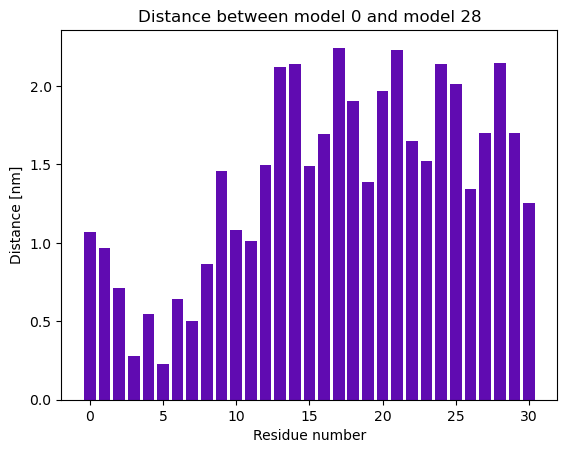

<Figure size 640x480 with 0 Axes>

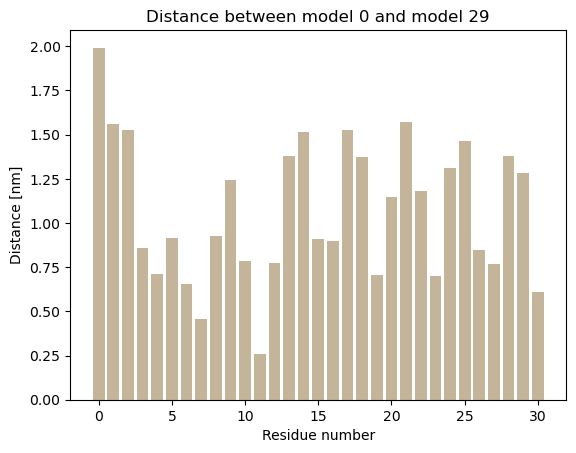

<Figure size 640x480 with 0 Axes>

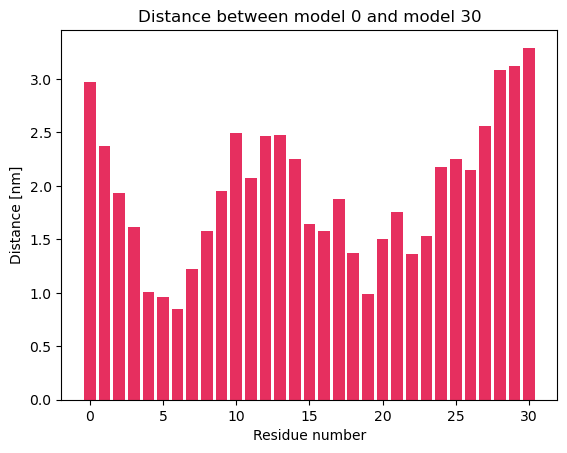

<Figure size 640x480 with 0 Axes>

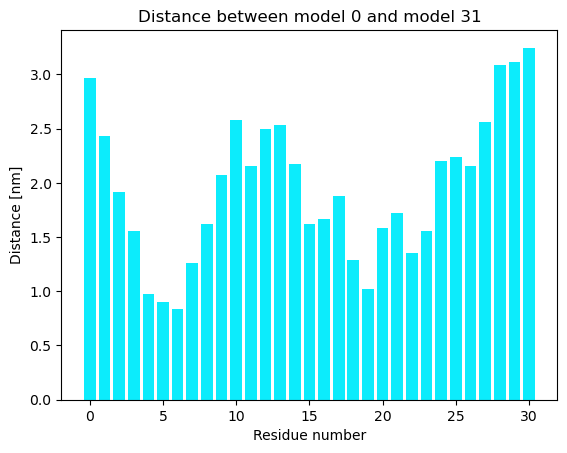

<Figure size 640x480 with 0 Axes>

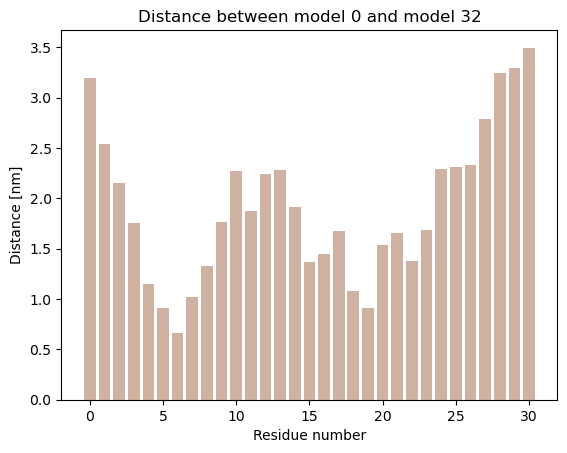

<Figure size 640x480 with 0 Axes>

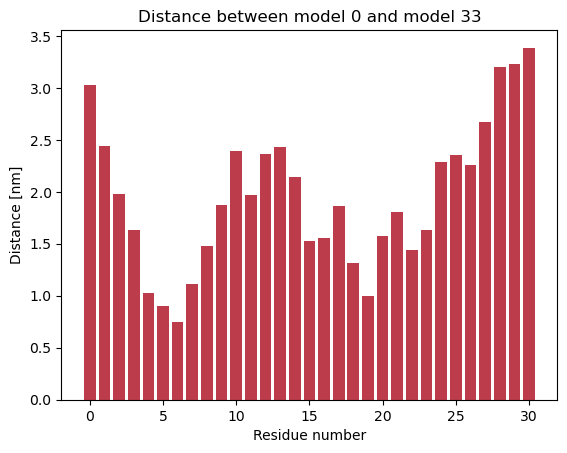

<Figure size 640x480 with 0 Axes>

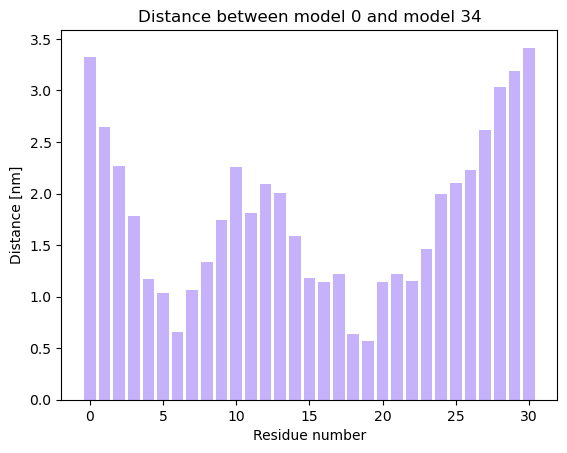

<Figure size 640x480 with 0 Axes>

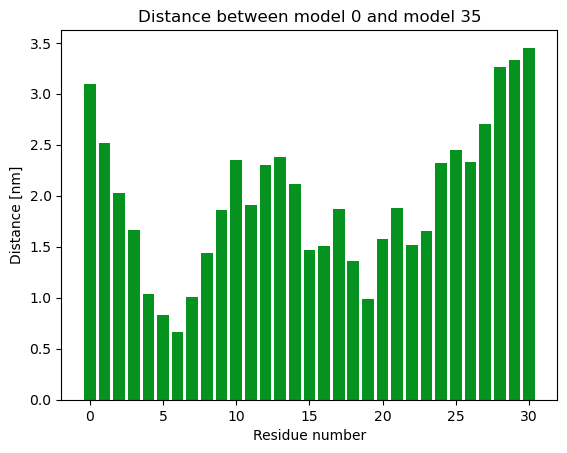

<Figure size 640x480 with 0 Axes>

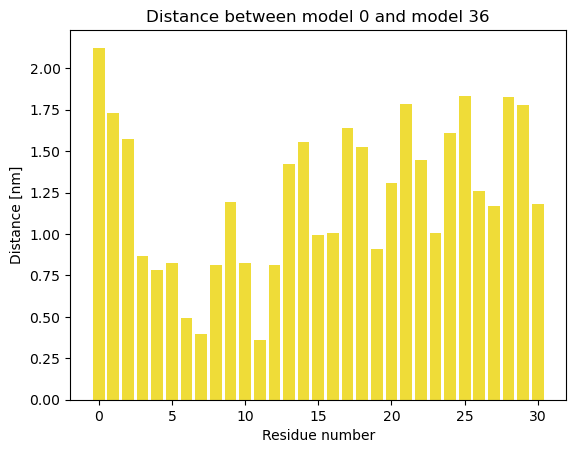

<Figure size 640x480 with 0 Axes>

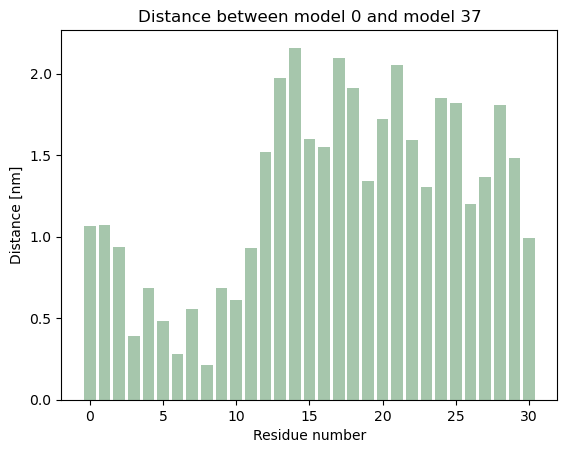

<Figure size 640x480 with 0 Axes>

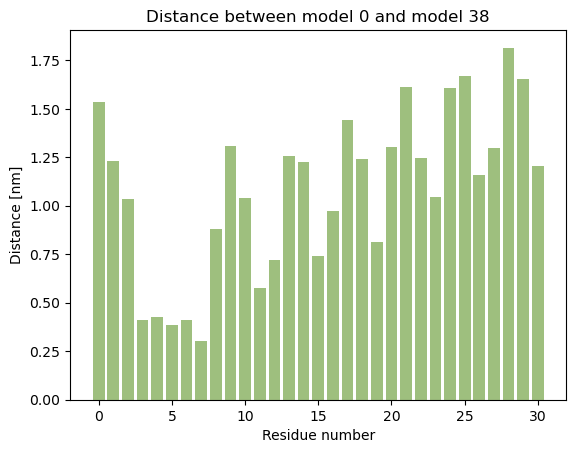

<Figure size 640x480 with 0 Axes>

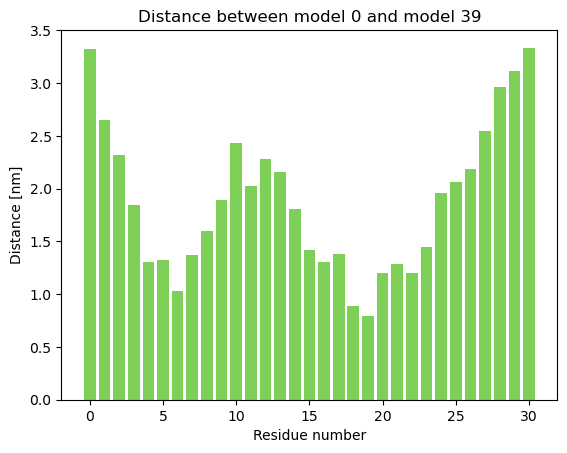

<Figure size 640x480 with 0 Axes>

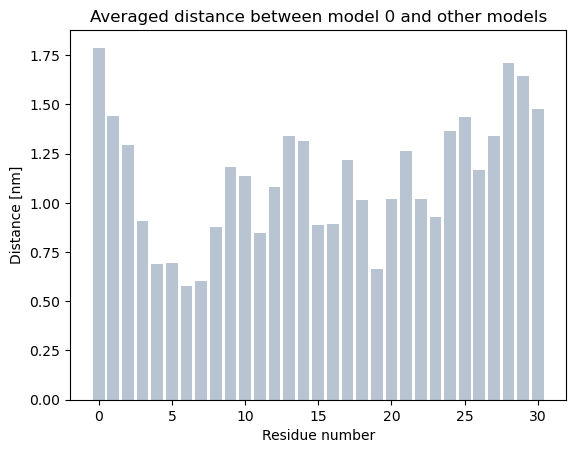

<Figure size 640x480 with 0 Axes>

In [88]:
text_file=open('1V1D_ensemble/1V1D_ColabFold/pdblist', "r")
pdblist=text_file.read().split('\n')[:-1]

all_models = {}

n = 0
for i in pdblist:
     t_i = md.load_pdb(i)
     all_models[n] = t_i
     n += 1

CA_atoms = all_models[0].topology.select('name CA') 
residue_numbers = [all_models[0].topology.atom(i).residue.index for i in CA_atoms]

distances_mean = np.zeros(31)

for n in range(1,40):

    distances = np.sqrt(np.sum((all_models[0].xyz[0, CA_atoms, :] - all_models[n].xyz[0, CA_atoms, :])**2, axis=1))
    distances_mean += distances/40

    # print(distances.shape)
    # print(residue_numbers)
    plt.figure()
    plt.bar(residue_numbers, distances,color = np.random.rand(3,))
    plt.xlabel('Residue number')
    plt.ylabel('Distance [nm]')
    plt.title('Distance between model 0 and model '+str(n))
    plt.show()
    plt.savefig('1V1D_ensemble/Images/model0_and_model_'+str(n)+'_CA_atoms_distance_bar_chart.png')

# AVERAGED OVER ALL MODELS
plt.figure()
plt.bar(residue_numbers, distances_mean,color = np.random.rand(3,))
plt.xlabel('Residue number')
plt.ylabel('Distance [nm]')
plt.title('Averaged distance between model 0 and other models')
plt.show()
plt.savefig('1V1D_ensemble/Images/averaged_distance_between_model_0_and_other_models'+'_bar_chart.png')

# Higher deviations typically occur in three regions: 
# on the ends (which are usually floppy) and residues 9 to 15 (a disordered loop and start of the alpha-helix)